In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tabulate import tabulate
from IPython.display import display
from uncertainties import umath as um
from uncertainties import unumpy as unp
from uncertainties import ufloat


plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Используем засечковый шрифт
    "font.serif": ["Computer Modern"],
    "text.latex.preamble": r"""
        \usepackage[utf8]{inputenc}
        \usepackage[russian]{babel}
        \usepackage[T2A]{fontenc}
    """,
    "pgf.texsystem": "xelatex"
})

def calculate_r2(x, y):
    
    popt, pcov = curve_fit(lambda x,k,b: k*x+b, x,y)

    y_true = y 
    y_pred = popt[0]*x + popt[1]

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (ss_res / ss_tot)


def linear(x, y, label="", **kwargs):
    """Perform linear regression and plot results"""
    # Convert pandas Series to numpy arrays
    x = np.array(x, dtype=float)
    y = np.array(y, dtype=float)
    
    popt, pcov = curve_fit(lambda x, k, b: k*x + b, x, y)
    x_min = np.min(x)
    x_max = np.max(x)
    x_ax = np.linspace(x_min, x_max, 100)
    y_ax = popt[0] * x_ax + popt[1]
    
    R2 = calculate_r2(x, y)
    
    plt.scatter(x, y)
    plt.plot(x_ax, y_ax, label=f"{label} $R^2$ = {R2:.5f}", **kwargs)
    
    coefs = unp.uarray(popt, np.sqrt(np.diag(pcov)))
    
    return coefs

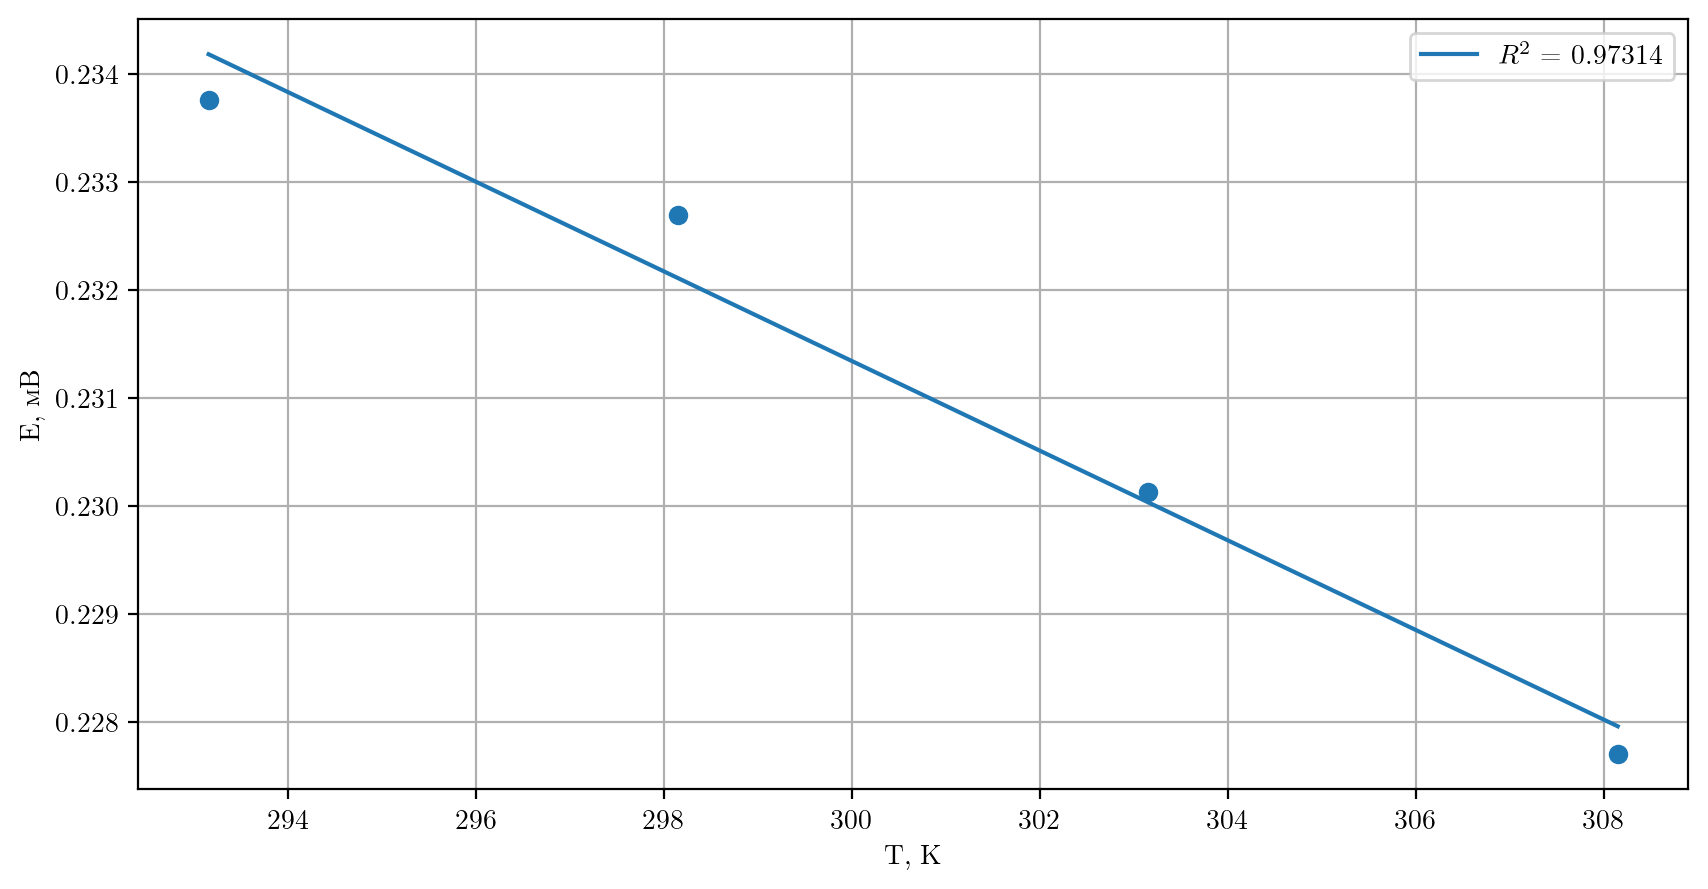

[-40.01990456147921+/-4.7013379356600655
 34325.61790640826+/-1413.7015588939767]
S = -40+/-5 H = (-3.43+/-0.14)e+04 G = (-2.24+/-0.20)e+04


In [17]:
x = np.array([20,25,30,35], dtype = float)
x += 273.15
y = np.array([233.76,232.69,230.13,227.7]) * 0.001



plt.figure(figsize=(10,5), dpi=200)
popt = linear(x, y)
plt.xlabel("T, К")
plt.ylabel("E, мВ")
plt.grid()
plt.legend()
plt.savefig("images/eds-ot-temp.png")
plt.show()



F = 96480
print(popt*F)

print(f"S = {popt[0]*F}", 
      f"H = {-popt[1]*F}",
     f"G = {-popt[1]*F - 298.15*popt[0]*F}")



Оптимальная степень полинома: 15


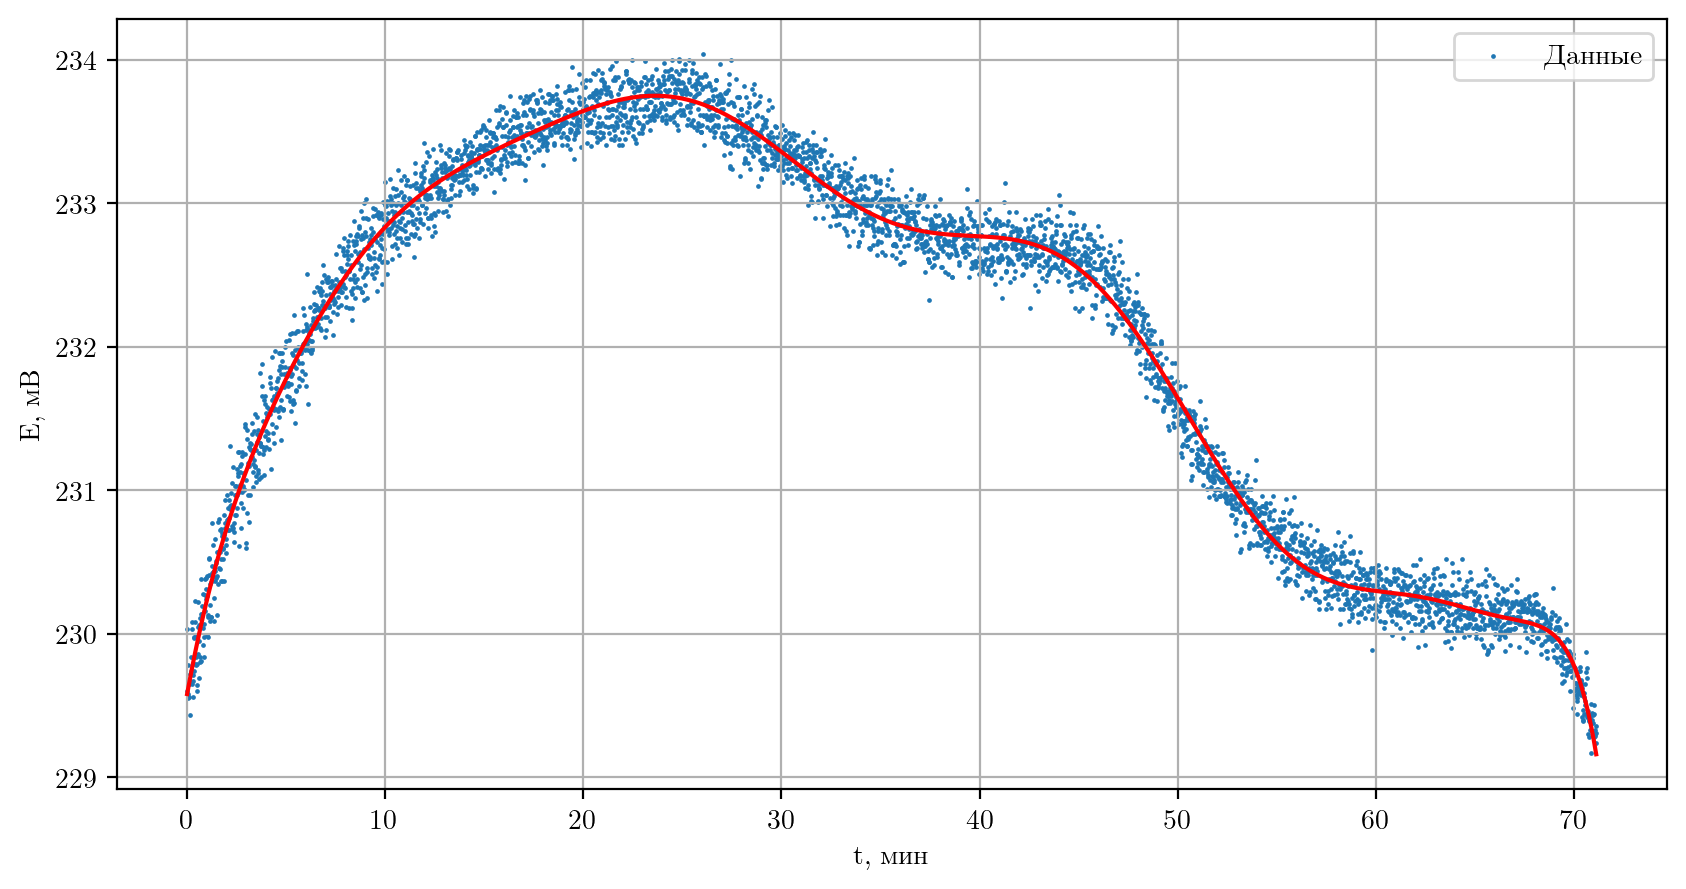

In [7]:
x = []
y = []

with open('files/eds.txt', 'r') as file:
    # Читаем файл построчно
    for line in file:
        # Удаляем лишние пробелы в начале и конце строки
        line = line.strip()
        
        # Пропускаем пустые строки
        if not line:
            continue
            
        # Разбиваем строку на отдельные значения, используя несколько пробелов как разделитель
        values = line.split()
        
        # Преобразуем строковые значения в числа с плавающей точкой
        try:
            value1 = float(values[0])
            value2 = float(values[1])
            value3 = float(values[2])
            x.append(value1)
            y.append(value2)
        except:
            print("Пенис")

x = np.array(x)/60
y = np.array(y)



import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# Функция для полинома произвольной степени
def polynomial(x, *coeffs):
    return sum(c * x**i for i, c in enumerate(coeffs[::-1]))

# Выбор оптимальной степени
best_degree = 0
best_error = float('inf')
max_degree = 20  # максимальная степень для проверки

for degree in range(1, max_degree + 1):
    try:
        # Начальное приближение (все коэффициенты = 1)
        p0 = [1] * (degree + 1)
        
        # Подгонка
        popt, pcov = curve_fit(polynomial, x, y, p0=p0)
        
        # Оценка ошибки (среднеквадратичная ошибка)
        y_pred = polynomial(x, *popt)
        error = np.mean((y - y_pred)**2)
        
        if error < best_error:
            best_error = error
            best_degree = degree
            best_popt = popt
            
    except RuntimeError:
        continue

print(f"Оптимальная степень полинома: {best_degree}")



# Визуализация
plt.figure(figsize=(10, 5), dpi=200)
plt.scatter(x, y, s=0.5, label='Данные')
plt.plot(x, polynomial(x, *best_popt), 'r-')
plt.xlabel("t, мин")
plt.ylabel("E, мВ")
plt.grid()
plt.legend()
plt.savefig("images/eds-ot-time.png")
plt.show()